In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import psycopg2
import numpy as np

pd.set_option('display.max_columns',150)

# Import data from Database

In [2]:
conn = psycopg2.connect("dbname=ipo-database user=postgres password=0nlineSQL")

In [3]:
master_df = pd.read_sql_query("SELECT * from master_data;", conn)
master_df.head()

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate
0,BSN.U,2020-09-11,Broadstone Acquisition,Citigroup,$10.00,$9.84,$9.60,-0.04,-$0.16,-$0.40,1.0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LEAP.U,2020-09-11,Ribbit LEAP,JPMorgan,$10.00,$11.20,$11.55,0.16,$1.20,$1.55,1.0,Missed,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SNPR.U,2020-09-11,Tortoise Acquisition Corp. II,Barclays/ Goldman Sachs,$10.00,$10.35,$10.51,0.05,$0.35,$0.51,1.0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TWCTU,2020-09-11,TWC Tech Holdings II,Citigroup/ Deutsche Bank Securities,$10.00,$10.08,$10.07,0.01,$0.08,$0.07,1.0,None,Common Stock,TWC Tech Holdings II Corp,NASDAQ,USD,USA,None,None,"Fo

In [4]:
master_df.shape

(3470, 113)

In [5]:
list(master_df)

['symbol',
 'trade_date',
 'issuer',
 'lead_jointlead_managers',
 'offer_price',
 'opening_price',
 'firstday_close',
 'firstday_percent_pxchng',
 'dollar_change_opening',
 'dollar_change_close',
 'star_ratings',
 'performed',
 'asset_type',
 'company_name',
 'exchange',
 'currency',
 'country',
 'sector',
 'industry',
 'address',
 'three_mth_date',
 'three_mth_ipo',
 'price_change',
 'three_mth_return',
 'price_gain_loss',
 'fiscaldate_end',
 'reported_currency',
 'gross_profit',
 'total_revenue',
 'costof_revenue',
 'costof_goodservices_sold',
 'operating_income',
 'selling_gen_admin',
 'research_dev',
 'operating_expenses',
 'investment_income_net',
 'net_interest_income',
 'interest_income',
 'interest_expense',
 'noninterest_income',
 'othernon_operatingincome',
 'depreciation',
 'dpr_and_amort',
 'income_beforetax',
 'incometax_expense',
 'interest_debt_expense',
 'netincome_cont_operations',
 'comprehensive_income_netoftax',
 'ebit',
 'ebitda',
 'netincome',
 'total_assets',
 't

In [6]:
# Filter for rows where Company Overview data was retreived.
master_df_1 = master_df.dropna(subset=["exchange"])
master_df_1

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate
3,TWCTU,2020-09-11,TWC Tech Holdings II,Citigroup/ Deutsche Bank Securities,$10.00,$10.08,$10.07,0.01,$0.08,$0.07,1.0,None,Common Stock,TWC Tech Holdings II Corp,NASDAQ,USD,USA,None,None,"Four Embarcadero Center, San Francisco, CA, Un...",2020-12-11,10.520,0.440,0.043651,Gain,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602386112.0,2386112.0,1987330.0,1987330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21576520.0,576520.0,421362.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.450,0.450,0.045000,Gain,2020-09-30,USD,0.0,0.0,0.0,0.0,-200738.0,52801.0,0.0,200738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-173512.0,0.0,0.0,-173512.0,0.0,-200738.0,0.0,-173512.0,407194144.0,2932388.0,2652970.0,2652970.0,0.0,0.0,404261756.0,0.0,0.0,0.0,0.0,0.0,0.0,404261756.0,0.0,0.0,404261756.0,18703619.0,263065.0,42363.0,0.0,0.0,0.0,18440554.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388490525.0,0.0,-177065.0,0.0,40423453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ITACU,2020-09-09,Industrial Tech Acquisitions,Maxim Group,$10.00,$9.92,$9.97,0.00,-$0.08,-$0.03,1.0,None,Common Stock,"Industrial Tech Acquisitions, Inc",NASDAQ,USD,USA,Financial Services,Shell Companies,"5090 Richmond Avenue, Houston, TX, United Stat...",2020-12-

In [7]:
# Filter out rows where 3 month return could not be calculated
master_df_2 = master_df_1.dropna(subset=["price_gain_loss"])
master_df_2

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate
3,TWCTU,2020-09-11,TWC Tech Holdings II,Citigroup/ Deutsche Bank Securities,$10.00,$10.08,$10.07,0.01,$0.08,$0.07,1.0,None,Common Stock,TWC Tech Holdings II Corp,NASDAQ,USD,USA,None,None,"Four Embarcadero Center, San Francisco, CA, Un...",2020-12-11,10.520,0.440,0.043651,Gain,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602386112.0,2386112.0,1987330.0,1987330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21576520.0,576520.0,421362.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.450,0.450,0.045000,Gain,2020-09-30,USD,0.0,0.0,0.0,0.0,-200738.0,52801.0,0.0,200738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-173512.0,0.0,0.0,-173512.0,0.0,-200738.0,0.0,-173512.0,407194144.0,2932388.0,2652970.0,2652970.0,0.0,0.0,404261756.0,0.0,0.0,0.0,0.0,0.0,0.0,404261756.0,0.0,0.0,404261756.0,18703619.0,263065.0,42363.0,0.0,0.0,0.0,18440554.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388490525.0,0.0,-177065.0,0.0,40423453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ITACU,2020-09-09,Industrial Tech Acquisitions,Maxim Group,$10.00,$9.92,$9.97,0.00,-$0.08,-$0.03,1.0,None,Common Stock,"Industrial Tech Acquisitions, Inc",NASDAQ,USD,USA,Financial Services,Shell Companies,"5090 Richmond Avenue, Houston, TX, United Stat...",2020-12-

In [8]:
master_df_2.head(30)

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate
3,TWCTU,2020-09-11,TWC Tech Holdings II,Citigroup/ Deutsche Bank Securities,$10.00,$10.08,$10.07,0.01,$0.08,$0.07,1.0,None,Common Stock,TWC Tech Holdings II Corp,NASDAQ,USD,USA,None,None,"Four Embarcadero Center, San Francisco, CA, Un...",2020-12-11,10.5200,0.4400,0.043651,Gain,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.023861e+08,2.386112e+06,1.987330e+06,1.987330e+06,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.157652e+07,5.765200e+05,421362.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,2.420000e+02,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.4500,0.4500,0.045000,Gain,2020-09-30,USD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.007380e+05,5.280100e+04,0.0,2.007380e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.735120e+05,0.0,0.0,-1.735120e+05,0.0,-2.007380e+05,0.0,-1.735120e+05,4.071941e+08,2.932388e+06,2.652970e+06,2.652970e+06,0.0,0.0,4.042618e+08,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,4.042618e+08,0.000000e+00,0.000000e+00,404261756.0,1.870362e+07,2.630650e+05,42363.0,0.0,0.0,0.0,1.844055e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.884905e+08,0.0,-1.770650e+0

In [9]:
# Filter out rows where quarterly financials within +/-45 days of IPO date could be retreived from Alpha Vantage
master_df_3 = master_df_2.dropna(subset=["fiscaldate_end"])
master_df_3

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.45,0.45,0.045000,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-2.007380e+05,5.280100e+04,0.0,2.007380e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.735120e+05,0.0,0.0,-1.735120e+05,0.0,-2.007380e+05,0.0,-1.735120e+05,4.071941e+08,2.932388e+06,2.652970e+06,2.652970e+06,0.0,0.0,4.042618e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,404261756.0,0.000000e+00,0.000000e+00,404261756.0,1.870362e+07,2.630650e+05,42363.0,0.0,0.0,0.0,1.844055e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,3.884905e+08,0.0,-1.770650e+05,0.0,4.042345e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,INAQU,2020-09-02,INSU Acquisition Corp. II,Cantor,$10.00,$10.20,$10.26,0.03,$0.20,$0.26,1.0,None,Common Stock,INSU Acquisition Corp. II,NASDAQ,USD,USA,Financial Services,Shell Companies,"2929 Arch Street, Philadelphia, PA, United Sta...",2020-12-02,12.92,2.72,0.266667,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-8.500100e+04,0.000000e+00,0.0,8.500100e+04,0.0,1386.0,1386.0,0.0,0.0,0.0,0.0,0.0,-8.361500e+04,0.0,0.0,-8.361500e+04,0.0,-8.500100e+04,0.0,-8.361500e+04,2.309328e+08,9.314130e+05,6.909710e+05,6.909710e+05,0.0,0.0,2.300014e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,230001386.0,9.826454e+06,2.645400e+04,0.0,0.0,0.0,0.0,9.800000e+06,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,2.211063e+08,0.0,-8.473900e+04,0.0,3.138667e+07,-300113.0,0.0,0.0,0.0,0.0,0.0,0

##### Results of Data Cleaning and filtering:

Out of the total number of IPOs (3,470):

- 2,685 of them had Company Overview Data
- 1,690 of them had enough information to calculate 3 month return
- 485 of them had quarterly financial information within +/- 45 days of IPO date

## Calculated Columns

In [10]:
# Net profit margin
master_df_3["net_profit_margin"] = master_df_3["netincome"]/master_df_3["total_revenue"]
master_df_3["net_profit_margin"]

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6           -inf
11          -inf
14           NaN
15     -0.573314
19     -0.577232
          ...   
2722    0.000000
2823    0.383139
2907    0.168834
2932    0.150321
3020    0.000000
Name: net_profit_margin, Length: 485, dtype: float64

In [11]:
# Calculate Gross Profit Margin = gross_profit/total_revenue
master_df_3["gross_profit_margin"] = master_df_3["gross_profit"]/master_df_3["total_revenue"]
master_df_3["gross_profit_margin"]

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6            NaN
11           NaN
14           NaN
15      0.050094
19      0.045998
          ...   
2722    0.000000
2823    0.000000
2907    0.000000
2932    0.000000
3020    0.000000
Name: gross_profit_margin, Length: 485, dtype: float64

In [12]:
# Calculate EBIT Margin = EBIT/total_revenue
master_df_3["EBIT_margin"] = master_df_3["ebit"]/master_df_3["total_revenue"]
master_df_3["EBIT_margin"]

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6           -inf
11          -inf
14           NaN
15     -0.567581
19     -0.886901
          ...   
2722    0.000000
2823    0.000000
2907    0.000000
2932    0.000000
3020    0.000000
Name: EBIT_margin, Length: 485, dtype: float64

### Calculate Debt Asset Ratio:

The formula for the debt to asset ratio is as follows: Debt/Asset = (Short-term Debt + Long-term Debt) / Total Assets. Where: Total Assets may include all current and non-current assets on the company's balance sheet, or may only include certain assets such as Property, Plant & Equipment (PP&E)

In [13]:
# Debt to Asset Ratio
master_df_3["debt_asset_ratio"] = master_df_3["short_longterm_debt_total"]/master_df_3["total_assets"]
master_df_3

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.45,0.45,0.045000,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-2.007380e+05,5.280100e+04,0.0,2.007380e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.735120e+05,0.0,0.0,-1.735120e+05,0.0,-2.007380e+05,0.0,-1.735120e+05,4.071941e+08,2.932388e+06,2.652970e+06,2.652970e+06,0.0,0.0,4.042618e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,404261756.0,0.000000e+00,0.000000e+00,404261756.0,1.870362e+07,2.630650e+05,42363.0,0.0,0.0,0.0,1.844055e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,3.884905e+08,0.0,-1.770650e+05,0.0,4.042345e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,NaN,-inf,0.000000
11,INAQU,2020-09-02,INSU Acquisition Corp. II,Cantor,$10.00,$10.20,$10.26,0.03,$0.20,$0.26,1.0,None,Common Stock,INSU Acquisition Corp. II,NASDAQ,USD,USA,Financial Services,Shell Companies,"2929 Arch Street, Philadelphia, PA, United Sta...",2020-12-02,12.92,2.72,0.266667,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-8.500100e+04,0.000000e+00,0.0,8.500100e+04,0.0,1386.0,1386.0,0.0,0.0,0.0,0.0,0.0,-8.361500e+04,0.0,0.0,-8.361500e+04,0.0,-8.500100e+04,0.0,-8.361500e+04,2.309328e+08,9.314130e+05,6.909710e+05,6.909710e+05,0.0,0.0,2.300014e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,230001386.0,9.826454e+06,2.645400e+04,0.0,0.0,0.0,0.0,9.800000e+06,0.0,0.000000e+00,0.0,0.0,0.0,0.0000

### Calculate Debt Equity Ratio

In [14]:
# Debt to Equity Ratio
master_df_3["debt_equity_ratio"] = master_df_3["short_longterm_debt_total"]/master_df_3["total_shareholder_equity"]
master_df_3

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio,debt_equity_ratio
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.45,0.45,0.045000,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-2.007380e+05,5.280100e+04,0.0,2.007380e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.735120e+05,0.0,0.0,-1.735120e+05,0.0,-2.007380e+05,0.0,-1.735120e+05,4.071941e+08,2.932388e+06,2.652970e+06,2.652970e+06,0.0,0.0,4.042618e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,404261756.0,0.000000e+00,0.000000e+00,404261756.0,1.870362e+07,2.630650e+05,42363.0,0.0,0.0,0.0,1.844055e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,3.884905e+08,0.0,-1.770650e+05,0.0,4.042345e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,NaN,-inf,0.000000,0.000000
11,INAQU,2020-09-02,INSU Acquisition Corp. II,Cantor,$10.00,$10.20,$10.26,0.03,$0.20,$0.26,1.0,None,Common Stock,INSU Acquisition Corp. II,NASDAQ,USD,USA,Financial Services,Shell Companies,"2929 Arch Street, Philadelphia, PA, United Sta...",2020-12-02,12.92,2.72,0.266667,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-8.500100e+04,0.000000e+00,0.0,8.500100e+04,0.0,1386.0,1386.0,0.0,0.0,0.0,0.0,0.0,-8.361500e+04,0.0,0.0,-8.361500e+04,0.0,-8.500100e+04,0.0,-8.361500e+04,2.309328e+08,9.314130e+05,6.909710e+05,6.909710e+05,0.0,0.0,2.300014e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,230001386.0,9.826454e+06,2.645400e+04,0.0,0.0,0.0,0.0,9.800000e+06,0.0,0.00

### Calculate Current Ratio:

This is a financial KPI that measure the company's ability to pay off its short term financial obligations in one year.

The formula for Current Ratio is Total Current Assets / Total Current Liabilities.

In [15]:
# Current Ratio
master_df_3["current_ratio"] = master_df_3["total_current_assets"]/master_df_3["total_current_liabilities"]
master_df_3

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio,debt_equity_ratio,current_ratio
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.45,0.45,0.045000,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-2.007380e+05,5.280100e+04,0.0,2.007380e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.735120e+05,0.0,0.0,-1.735120e+05,0.0,-2.007380e+05,0.0,-1.735120e+05,4.071941e+08,2.932388e+06,2.652970e+06,2.652970e+06,0.0,0.0,4.042618e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,404261756.0,0.000000e+00,0.000000e+00,404261756.0,1.870362e+07,2.630650e+05,42363.0,0.0,0.0,0.0,1.844055e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,3.884905e+08,0.0,-1.770650e+05,0.0,4.042345e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,NaN,-inf,0.000000,0.000000,11.147009
11,INAQU,2020-09-02,INSU Acquisition Corp. II,Cantor,$10.00,$10.20,$10.26,0.03,$0.20,$0.26,1.0,None,Common Stock,INSU Acquisition Corp. II,NASDAQ,USD,USA,Financial Services,Shell Companies,"2929 Arch Street, Philadelphia, PA, United Sta...",2020-12-02,12.92,2.72,0.266667,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-8.500100e+04,0.000000e+00,0.0,8.500100e+04,0.0,1386.0,1386.0,0.0,0.0,0.0,0.0,0.0,-8.361500e+04,0.0,0.0,-8.361500e+04,0.0,-8.500100e+04,0.0,-8.361500e+04,2.309328e+08,9.314130e+05,6.909710e+05,6.909710e+05,0.0,0.0,2.300014e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,230001386.0,9.826454e+06,2.645400e+04,0.0,0.0,0.0,0

### Calculate Operating Cash Flow Ratio

In [16]:
# Operating Cash Flow Ratio
master_df_3["OCF_ratio"] = master_df_3["operating_cashflow"]/master_df_3["total_current_liabilities"]
master_df_3

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio
6,SVACU,2020-09-10,Starboard Value Acquisition,UBS Investment Bank/ Stifel/ Cowen,$10.00,$10.00,$10.00,0.00,$0.00,$0.00,1.0,None,Common Stock,Starboard Value Acquisition Corp,NASDAQ,USD,USA,Financial Services,Shell Companies,"777 Third Avenue, New York, NY, United States,...",2020-12-10,10.45,0.45,0.045000,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-2.007380e+05,5.280100e+04,0.0,2.007380e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.735120e+05,0.0,0.0,-1.735120e+05,0.0,-2.007380e+05,0.0,-1.735120e+05,4.071941e+08,2.932388e+06,2.652970e+06,2.652970e+06,0.0,0.0,4.042618e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,404261756.0,0.000000e+00,0.000000e+00,404261756.0,1.870362e+07,2.630650e+05,42363.0,0.0,0.0,0.0,1.844055e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,3.884905e+08,0.0,-1.770650e+05,0.0,4.042345e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,NaN,-inf,0.000000,0.000000,11.147009,NaN
11,INAQU,2020-09-02,INSU Acquisition Corp. II,Cantor,$10.00,$10.20,$10.26,0.03,$0.20,$0.26,1.0,None,Common Stock,INSU Acquisition Corp. II,NASDAQ,USD,USA,Financial Services,Shell Companies,"2929 Arch Street, Philadelphia, PA, United Sta...",2020-12-02,12.92,2.72,0.266667,Gain,2020-09-30,USD,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-8.500100e+04,0.000000e+00,0.0,8.500100e+04,0.0,1386.0,1386.0,0.0,0.0,0.0,0.0,0.0,-8.361500e+04,0.0,0.0,-8.361500e+04,0.0,-8.500100e+04,0.0,-8.361500e+04,2.309328e+08,9.314130e+05,6.909710e+05,6.909710e+05,0.0,0.0,2.300014e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,230001386.0,9.826454e+06,2.645400e+04

### Drop rows with N/As and infinite values

In [17]:
master_df_4 = master_df_3.dropna(subset=["gross_profit_margin","debt_asset_ratio","debt_equity_ratio","current_ratio","OCF_ratio","EBIT_margin"])
master_df_4

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio
15,AUVI,2020-08-31,Applied UV,"Network 1 Financial Securities,",$5.00,$5.75,$11.60,1.32,$0.75,$6.60,0.0,None,Common Stock,"Applied UV, Inc",NASDAQ,USD,USA,Consumer Cyclical,"Furnishings, Fixtures & Appliances","150 N. Macquesten Parkway, Mount Vernon, NY, U...",2020-11-30,5.18,-0.57,-0.099130,Loss,2020-09-30,USD,7.817800e+04,1.560633e+06,1.482455e+06,1.482455e+06,-8.949670e+05,9.251080e+05,48037.0,2.455600e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.947320e+05,0.0,0.0,-8.947320e+05,0.0,-8.857850e+05,0.0,-8.947320e+05,7.761878e+06,7.011560e+06,5.897441e+06,5.897441e+06,189755.0,0.0,7.503180e+05,6.358600e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.462780e+05,114458.0,2.316365e+06,1.610803e+06,0.0,0.0,0.0,99297.0,7.055620e+05,5.325850e+05,3.175300e+05,9.929700e+04,0.0,416827.0,8.537970e+05,0.0,5.445513e+06,0.0,1.745910e+05,633.0,6.334308e+06,-4.298970e+05,0.0,0.0,0.0,0.0,9182.0,55814.0,0.0,-45156.0,0.0,-5.581400e+04,4927529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.573314,0.050094,-0.567581,0.053702,0.076545,4.352835,-0.266884
19,XPEV,2020-08-27,XPeng,Credit Suisse/ J.P. Morgan/ BofA Securities,$15.00,$23.10,$21.22,0.41,$8.10,$6.22,3.0,None,Common Stock,XPeng Inc,NYSE,USD,USA,Consumer Cyclical,Auto Manufacturers,"No. 8 Songgang Road, Guangzhou, China, 510640",2020-11-27,64.28,41.18,1.782684,Gain,2020-09-30,CNY,9.154100e+07,1.990119e+09,1.898578e+09,1.898578e+09,-1.744184e+09,1.203792e+09,635373000.0,3.734303e+09,0.0,19290000.0,23216000.0,3926000.0,0.0,0.0,0.0,0.0,-1.148755e+09,6000.0,0.0,-1.148761e+09,0.0,-1.765038e+09,0.0,-1.148761e+09,2.779659e+10,2.326173e+10,1.222

In [18]:
# Remove infinity values from calculated columns dividing by 0
master_df_5 = master_df_4.replace([-np.inf, np.inf], np.nan)
master_df_5

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio
15,AUVI,2020-08-31,Applied UV,"Network 1 Financial Securities,",$5.00,$5.75,$11.60,1.32,$0.75,$6.60,0.0,None,Common Stock,"Applied UV, Inc",NASDAQ,USD,USA,Consumer Cyclical,"Furnishings, Fixtures & Appliances","150 N. Macquesten Parkway, Mount Vernon, NY, U...",2020-11-30,5.18,-0.57,-0.099130,Loss,2020-09-30,USD,7.817800e+04,1.560633e+06,1.482455e+06,1.482455e+06,-8.949670e+05,9.251080e+05,48037.0,2.455600e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.947320e+05,0.0,0.0,-8.947320e+05,0.0,-8.857850e+05,0.0,-8.947320e+05,7.761878e+06,7.011560e+06,5.897441e+06,5.897441e+06,189755.0,0.0,7.503180e+05,6.358600e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.462780e+05,114458.0,2.316365e+06,1.610803e+06,0.0,0.0,0.0,99297.0,7.055620e+05,5.325850e+05,3.175300e+05,9.929700e+04,0.0,416827.0,8.537970e+05,0.0,5.445513e+06,0.0,1.745910e+05,633.0,6.334308e+06,-4.298970e+05,0.0,0.0,0.0,0.0,9182.0,55814.0,0.0,-45156.0,0.0,-5.581400e+04,4927529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.573314,0.050094,-0.567581,0.053702,0.076545,4.352835,-0.266884
19,XPEV,2020-08-27,XPeng,Credit Suisse/ J.P. Morgan/ BofA Securities,$15.00,$23.10,$21.22,0.41,$8.10,$6.22,3.0,None,Common Stock,XPeng Inc,NYSE,USD,USA,Consumer Cyclical,Auto Manufacturers,"No. 8 Songgang Road, Guangzhou, China, 510640",2020-11-27,64.28,41.18,1.782684,Gain,2020-09-30,CNY,9.154100e+07,1.990119e+09,1.898578e+09,1.898578e+09,-1.744184e+09,1.203792e+09,635373000.0,3.734303e+09,0.0,19290000.0,23216000.0,3926000.0,0.0,0.0,0.0,0.0,-1.148755e+09,6000.0,0.0,-1.148761e+09,0.0,-1.765038e+09,0.0,-1.148761e+09,2.779659e+10,2.326173e+10,1.222

## Calculate first day close

- Taking dollar_change_close which is the difference between the opening price and the first day close price

In [19]:
# Change $ string values to numeric - using regex
master_df_5["dollar_change_close"] = master_df_5["dollar_change_close"].replace('[\$,]', '', regex=True).astype(float)
master_df_5["dollar_change_close"]

15       6.60
19       6.22
39      17.44
51      19.00
96      60.59
        ...  
2528     4.00
2722     0.15
2907     5.70
2932    -0.90
3020     0.26
Name: dollar_change_close, Length: 288, dtype: float64

In [20]:
master_df_5['first_day_gain_loss'] = master_df_5['dollar_change_close'].apply(lambda x: 'Gain' if x > 0 else 'Loss')
master_df_5

,symbol,trade_date,issuer,lead_jointlead_managers,offer_price,opening_price,firstday_close,firstday_percent_pxchng,dollar_change_opening,dollar_change_close,star_ratings,performed,asset_type,company_name,exchange,currency,country,sector,industry,address,three_mth_date,three_mth_ipo,price_change,three_mth_return,price_gain_loss,fiscaldate_end,reported_currency,gross_profit,total_revenue,costof_revenue,costof_goodservices_sold,operating_income,selling_gen_admin,research_dev,operating_expenses,investment_income_net,net_interest_income,interest_income,interest_expense,noninterest_income,othernon_operatingincome,depreciation,dpr_and_amort,income_beforetax,incometax_expense,interest_debt_expense,netincome_cont_operations,comprehensive_income_netoftax,ebit,ebitda,netincome,total_assets,total_current_assets,cash_cashequivalent_carrvalue,cash_shortterm_investments,inventory,currentnet_receivables,total_noncurrent_assets,propertyplant_equip,acc_dpr_amort_ppe,intangible_assets,intangible_assets_exclgoodwill,goodwill,investments,longterm_investments,shortterm_investments,other_current_assets,other_noncurrrent_assets,total_liabilities,total_current_liabilities,current_acct_payable,deferred_revenue,current_debt,shortterm_debt,total_noncurrent_liabilities,capital_lease_obligations,longterm_debt,current_longterm_debt,longterm_debt_noncurrent,short_longterm_debt_total,other_current_liabilities,other_noncurrent_liabilities,total_shareholder_equity,treasury_stock,retained_earnings,common_stock,common_stockshares_outstanding,operating_cashflow,payments_foroperating_activities,proceeds_fromoperating_activities,changein_operating_liabilities,changein_operating_assets,dpr_depletion_amort,capital_expenditures,changein_receivables,changein_inventory,profit_loss,cashflow_frominvestment,cashflow_fromfinancing,proceeds_fromrepayment_shortterm_debt,payments_forrepurchase_commonstock,payments_forrepurchase_equity,payments_forrepurchase_preferredstock,div_payout,div_payout_commonstock,div_payout_preferredstock,proceeds_fromissuance_commonstock,proceeds_fromissuance_longterm_debtcapital_secnet,proceeds_fromissuance_preferredstock,proceeds_fromrepurchase_equity,proceeds_fromsale_treasurystock,changein_cash_cashequivalents,changein_exchangerate,net_profit_margin,gross_profit_margin,EBIT_margin,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,first_day_gain_loss
15,AUVI,2020-08-31,Applied UV,"Network 1 Financial Securities,",$5.00,$5.75,$11.60,1.32,$0.75,6.60,0.0,None,Common Stock,"Applied UV, Inc",NASDAQ,USD,USA,Consumer Cyclical,"Furnishings, Fixtures & Appliances","150 N. Macquesten Parkway, Mount Vernon, NY, U...",2020-11-30,5.18,-0.57,-0.099130,Loss,2020-09-30,USD,7.817800e+04,1.560633e+06,1.482455e+06,1.482455e+06,-8.949670e+05,9.251080e+05,48037.0,2.455600e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.947320e+05,0.0,0.0,-8.947320e+05,0.0,-8.857850e+05,0.0,-8.947320e+05,7.761878e+06,7.011560e+06,5.897441e+06,5.897441e+06,189755.0,0.0,7.503180e+05,6.358600e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.462780e+05,114458.0,2.316365e+06,1.610803e+06,0.0,0.0,0.0,99297.0,7.055620e+05,5.325850e+05,3.175300e+05,9.929700e+04,0.0,416827.0,8.537970e+05,0.0,5.445513e+06,0.0,1.745910e+05,633.0,6.334308e+06,-4.298970e+05,0.0,0.0,0.0,0.0,9182.0,55814.0,0.0,-45156.0,0.0,-5.581400e+04,4927529.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.573314,0.050094,-0.567581,0.053702,0.076545,4.352835,-0.266884,Gain
19,XPEV,2020-08-27,XPeng,Credit Suisse/ J.P. Morgan/ BofA Securities,$15.00,$23.10,$21.22,0.41,$8.10,6.22,3.0,None,Common Stock,XPeng Inc,NYSE,USD,USA,Consumer Cyclical,Auto Manufacturers,"No. 8 Songgang Road, Guangzhou, China, 510640",2020-11-27,64.28,41.18,1.782684,Gain,2020-09-30,CNY,9.154100e+07,1.990119e+09,1.898578e+09,1.898578e+09,-1.744184e+09,1.203792e+09,635373000.0,3.734303e+09,0.0,19290000.0,23216000.0,3926000.0,0.0,0.0,0.0,0.0,-1.148755e+09,6000.0,0.0,-1.148761e+09,0.0,-1.765038e+09,0.0,-1.148761e+09,2.779659

# Preprocess

In [21]:
IPO_df = master_df_5[["sector","industry","debt_asset_ratio","debt_equity_ratio","current_ratio","OCF_ratio","gross_profit_margin","net_profit_margin","cashflow_frominvestment","EBIT_margin","first_day_gain_loss"]]
IPO_df

,sector,industry,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,first_day_gain_loss
15,Consumer Cyclical,"Furnishings, Fixtures & Appliances",0.053702,0.076545,4.352835,-0.266884,0.050094,-0.573314,-5.581400e+04,-0.567581,Gain
19,Consumer Cyclical,Auto Manufacturers,0.000000,0.000000,3.921096,0.125960,0.045998,-0.577232,-5.924452e+09,-0.886901,Gain
39,Real Estate,Real Estate Services,0.000000,0.000000,1.886462,0.302679,0.213307,0.138040,2.751829e+09,-0.007261,Gain
51,Healthcare,Medical Care Facilities,0.165354,0.633880,1.601221,-0.022678,0.090474,-0.124847,-4.661000e+06,-0.101324,Gain
96,Technology,Software-Application,0.000000,0.000000,4.286222,0.234248,0.536819,-0.300338,-1.861000e+06,-0.285779,Gain
...,...,...,...,...,...,...,...,...,...,...,...
2528,Other,Other,0.000000,0.000000,0.000000,0.054240,0.000000,0.000000,0.000000e+00,0.000000,Gain
2722,Other,Other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Gain
2907,Other,Other,0.000000,0.000000,0.000000,0.016442,0.000000,0.168834,0.000000e+00,0.000000,Gain
2932,Other,Other,0.000000,0.000000,0.000000,0.055435,0.000000,0.150321,1.312000e+06,0.000000,Loss


In [22]:
IPO_df.shape

(288, 11)

In [23]:
IPO_df = IPO_df.dropna()
IPO_df.shape

(285, 11)

In [24]:
IPO_df.nunique()

sector                      12
industry                    67
debt_asset_ratio            90
debt_equity_ratio           90
current_ratio              214
OCF_ratio                  239
gross_profit_margin        188
net_profit_margin          256
cashflow_frominvestment    178
EBIT_margin                210
first_day_gain_loss          2
dtype: int64

# Encoding

In [25]:
# Binary encode
IPO_df_encoded = pd.get_dummies(IPO_df, columns=["sector","industry","first_day_gain_loss"])
IPO_df_encoded.head()

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management,first_day_gain_loss_Gain,first_day_gain_loss_Loss
15,0.053702,0.076545,4.352835,-0.266884,0.050094,-0.573314,-5.581400e+04,-0.567581,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19,0.000000,0.000000,3.921096,0.125960,0.045998,-0.577232,-5.924452e+09,-0.886901,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39,0.000000,0.000000,1.886462,0.302679,0.213307,0.138040,2.751829e+09,-0.007261,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
51,0.165354,0.633880,1.601221,-0.022678,0.090474,-0.124847,-4.661000e+06,-0.101324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,0.000000,0.000000,4.286222,0.234248,0.536819,-0.300338,-1.861000e+06,-0.285779,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# Target Feature

In [26]:
y = IPO_df_encoded.first_day_gain_loss_Gain
X = IPO_df_encoded.drop(columns=["first_day_gain_loss_Gain","first_day_gain_loss_Loss"])

In [27]:
y

15      1
19      1
39      1
51      1
96      1
       ..
2528    1
2722    1
2907    1
2932    0
3020    1
Name: first_day_gain_loss_Gain, Length: 285, dtype: uint8

In [28]:
X

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management
15,0.053702,0.076545,4.352835,-0.266884,0.050094,-0.573314,-5.581400e+04,-0.567581,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0.000000,0.000000,3.921096,0.125960,0.045998,-0.577232,-5.924452e+09,-0.886901,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,0.000000,0.000000,1.886462,0.302679,0.213307,0.138040,2.751829e+09,-0.007261,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,0.165354,0.633880,1.601221,-0.022678,0.090474,-0.124847,-4.661000e+06,-0.101324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0.000000,0.000000,4.286222,0.234248,0.536819,-0.300338,-1.861000e+06,-0.285779,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,0.000000,0.000000,0.000000,

In [29]:
X.describe()

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,0.207910,2.661924,2.980495,0.057765,0.045312,-22.037018,-7.160085e+07,-22.099913,0.014035,0.066667,0.084211,0.038596,0.017544,0.070175,0.171930,0.052632,0.364912,0.024561,0.084211,0.010526,0.003509,0.003509,0.003509,0.003509,0.007018,0.010526,0.003509,0.007018,0.105263,0.007018,0.003509,0.010526,0.003509,0.003509,0.003509,0.028070,0.014035,0.003509,0.014035,0.024561,0.007018,0.003509,0.003509,0.007018,0.003509,0.010526,0.007018,0.003509,0.007018,0.003509,0.003509,0.049123,0.024561,0.003509,0.003509,0.017544,0.003509,0.003509,0.003509,0.010526,0.003509,0.364912,0.010526,0.007018,0.007018,0.003509,0.007018,0.

# Split Training and Testing sets

In [30]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
X_train.shape

(213, 87)

In [32]:
y_train.shape

(213,)

In [33]:
X_test.shape

(72, 87)

In [34]:
y_test.shape

(72,)

# Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.569


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.653


# SVM
- issues running when operating cash flow was added

In [37]:
# from sklearn.svm import SVC

# # Create the SVM model
# svm = SVC(kernel='linear')

# # Train the model
# svm.fit(X_train, y_train)

# # Evaluate the model
# y_pred = svm.predict(X_test_scaled)
# print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

# Deep Learning

In [38]:
len(X_train_scaled[0])

87

In [39]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features*1.5
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=200) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5959
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7192
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7244
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7665
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7510
Epoch 6/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7496
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7823
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7605
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7767
Epoch 10/200
7/7 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.7579
Epoch 11/200
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8777
Epoch 85/200
7/7 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8551
Epoch 86/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.8756
Epoch 87/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8777
Epoch 88/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8689
Epoch 89/200
7/7 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8697
Epoch 90/200
7/7 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8315
Epoch 91/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8843
Epoch 92/200
7/7 [==============================] - 0s 997us/step - loss: 0.2890 - accuracy: 0.8630
Epoch 93/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8621
Epoch 94/200
7/7 [=============

7/7 [==============================] - 0s 1ms/step - loss: 0.2591 - accuracy: 0.8746
Epoch 167/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.8705
Epoch 168/200
7/7 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9037
Epoch 169/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.8798
Epoch 170/200
7/7 [==============================] - 0s 997us/step - loss: 0.2476 - accuracy: 0.8981
Epoch 171/200
7/7 [==============================] - 0s 831us/step - loss: 0.2574 - accuracy: 0.8863
Epoch 172/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.8661
Epoch 173/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9078
Epoch 174/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9058
Epoch 175/200
7/7 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.8952
Epoch 176/200
7/7 [=

# Loss Function

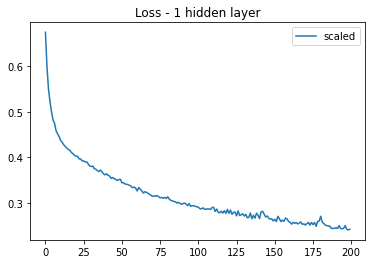

In [41]:
# Plot the loss function
import matplotlib.pyplot as plt

plt.plot(fit_model.history["loss"])
plt.title("Loss - 1 hidden layer")
plt.legend(["scaled"])

# Permutation Importance
- Significance of Features and their weights on our target feature

In [42]:
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

my_model = RandomForestClassifier(random_state=0).fit(imputed_X_train, y_train)

In [43]:
feature_names = [i for i in IPO_df_encoded.columns if IPO_df_encoded[i].dtype in [np.int64, np.float64]]
feature_names

['debt_asset_ratio',
 'debt_equity_ratio',
 'current_ratio',
 'OCF_ratio',
 'gross_profit_margin',
 'net_profit_margin',
 'cashflow_frominvestment',
 'EBIT_margin']

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(imputed_X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0278 ± 0.0430,gross_profit_margin
0.0139 ± 0.0176,industry_Biotechnology
0.0111 ± 0.0272,cashflow_frominvestment
0.0028 ± 0.0208,OCF_ratio
0.0028 ± 0.0369,debt_equity_ratio
0.0028 ± 0.0111,sector_Utilities
0.0000 ± 0.0176,industry_Other
0 ± 0.0000,industry_Capital Markets
0 ± 0.0000,industry_Chemicals
0 ± 0.0000,industry_Communication Equipment


In [45]:
explain_weights_df = eli5.explain_weights_df(perm, feature_names = X_test.columns.tolist())

In [46]:
explain_weights_df

,feature,weight,std
0,gross_profit_margin,0.027778,0.021517
1,industry_Biotechnology,0.013889,0.008784
2,cashflow_frominvestment,0.011111,0.013608
3,OCF_ratio,0.002778,0.010393
4,debt_equity_ratio,0.002778,0.018426
...,...,...,...
82,sector_Technology,-0.008333,0.006804
83,debt_asset_ratio,-0.008333,0.006804
84,industry_Credit Services,-0.011111,0.005556
85,current_ratio,-0.011111,0.010393


In [47]:
explain_weights_df["feature"]

0          gross_profit_margin
1       industry_Biotechnology
2      cashflow_frominvestment
3                    OCF_ratio
4            debt_equity_ratio
                ...           
82           sector_Technology
83            debt_asset_ratio
84    industry_Credit Services
85               current_ratio
86           net_profit_margin
Name: feature, Length: 87, dtype: object

In [48]:
explain_weights_df.loc[explain_weights_df['feature'].str.contains('industry', case=False), 'feature'] = 'industry'

In [49]:
explain_weights_df

,feature,weight,std
0,gross_profit_margin,0.027778,0.021517
1,industry,0.013889,0.008784
2,cashflow_frominvestment,0.011111,0.013608
3,OCF_ratio,0.002778,0.010393
4,debt_equity_ratio,0.002778,0.018426
...,...,...,...
82,sector_Technology,-0.008333,0.006804
83,debt_asset_ratio,-0.008333,0.006804
84,industry,-0.011111,0.005556
85,current_ratio,-0.011111,0.010393


In [50]:
# explain_weights_df.to_csv('explained_weights.csv', index=False)

In [51]:
explain_weights_df.loc[explain_weights_df['feature'].str.contains('sector', case=False), 'feature'] = 'sector'
explain_weights_df

,feature,weight,std
0,gross_profit_margin,0.027778,0.021517
1,industry,0.013889,0.008784
2,cashflow_frominvestment,0.011111,0.013608
3,OCF_ratio,0.002778,0.010393
4,debt_equity_ratio,0.002778,0.018426
...,...,...,...
82,sector,-0.008333,0.006804
83,debt_asset_ratio,-0.008333,0.006804
84,industry,-0.011111,0.005556
85,current_ratio,-0.011111,0.010393


In [52]:
explain_weights_df.groupby(explain_weights_df.columns, axis=1).sum()

,feature,std,weight
0,gross_profit_margin,0.021517,0.027778
1,industry,0.008784,0.013889
2,cashflow_frominvestment,0.013608,0.011111
3,OCF_ratio,0.010393,0.002778
4,debt_equity_ratio,0.018426,0.002778
...,...,...,...
82,sector,0.006804,-0.008333
83,debt_asset_ratio,0.006804,-0.008333
84,industry,0.005556,-0.011111
85,current_ratio,0.010393,-0.011111


In [53]:
grouped_weights_df = explain_weights_df.groupby(['feature'], as_index=False)['weight','std'].sum()
grouped_weights_df

C:\Users\death\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,feature,weight,std
0,EBIT_margin,-5.555556e-03,0.016667
1,OCF_ratio,2.777778e-03,0.010393
2,cashflow_frominvestment,1.111111e-02,0.013608
3,current_ratio,-1.111111e-02,0.010393
4,debt_asset_ratio,-8.333333e-03,0.006804
5,debt_equity_ratio,2.777778e-03,0.018426
6,gross_profit_margin,2.777778e-02,0.021517
7,industry,1.110223e-16,0.028679
8,net_profit_margin,-1.388889e-02,0.035136
9,sector,-2.222222e-02,0.038883


In [54]:
grouped_weights_df = grouped_weights_df.sort_values(by=['weight'], ascending=False)
grouped_weights_df

,feature,weight,std
6,gross_profit_margin,2.777778e-02,0.021517
2,cashflow_frominvestment,1.111111e-02,0.013608
1,OCF_ratio,2.777778e-03,0.010393
5,debt_equity_ratio,2.777778e-03,0.018426
7,industry,1.110223e-16,0.028679
0,EBIT_margin,-5.555556e-03,0.016667
4,debt_asset_ratio,-8.333333e-03,0.006804
3,current_ratio,-1.111111e-02,0.010393
8,net_profit_margin,-1.388889e-02,0.035136
9,sector,-2.222222e-02,0.038883


In [55]:
# grouped_weights_df.to_csv('grouped_weights_firstday.csv', index=False)

In [56]:
# industry_weights_df = explain_weights_df['feature'].str.contains('industry').groupby(explain_weights_df['weight']).sum()

# Confusion Matrix

In [57]:
y_pred = nn.predict(X_test_scaled)

In [58]:
y_predictions_df = pd.DataFrame(y_pred, index=X_test.index)
y_predictions_df

,0
516,1.000000e+00
588,7.253838e-01
841,1.589665e-02
1142,7.987759e-01
1777,7.282495e-04
...,...
1244,8.449303e-01
644,8.853793e-03
1005,5.782934e-08
2200,4.426582e-01


In [59]:
y_predictions_df.describe()

,0
count,72.000000
mean,0.695100
std,0.327467
min,0.000000
25%,0.626298
50%,0.722978
75%,0.996820
max,1.000000


In [60]:
x_test_df = pd.DataFrame(X_test)
x_test_df

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management
516,0.791023,-0.431128,1.669573,-0.056427,0.195109,-0.404897,-3778000.0,-0.079211,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
588,2.834215,-2.639492,1.821186,0.354131,0.999992,0.258264,-565045.0,0.326479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
841,0.000000,0.000000,0.000000,-2.237563,0.000000,-9.541401,-4358000.0,-4.306794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1142,0.000000,0.000000,6.355345,0.000000,1.000027,-0.292881,4323000.0,-0.256404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1777,0.000000,0.000000,0.000000,0.000000,0.000000,0.177614,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0.000000,0.000000,1.638391,-0.145572,0.65884

In [61]:
y_actual_df = pd.DataFrame(y_test)
y_actual_df

,first_day_gain_loss_Gain
516,1
588,1
841,0
1142,0
1777,0
...,...
1244,0
644,1
1005,1
2200,1


In [62]:
y_predictions_df.rename(columns={0 :'predicted_range'}, inplace=True )
y_predictions_df

,predicted_range
516,1.000000e+00
588,7.253838e-01
841,1.589665e-02
1142,7.987759e-01
1777,7.282495e-04
...,...
1244,8.449303e-01
644,8.853793e-03
1005,5.782934e-08
2200,4.426582e-01


In [63]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [64]:
cm = confusion_matrix(y_true=y_actual_df, y_pred=y_predictions_df.round())

In [65]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Gain/Loss')
    plt.xlabel('Predicted Gain/Loss')

In [73]:
cm_plot_labels = ['Loss','Gain']

Confusion matrix, without normalization
[[ 4 17]
 [10 41]]


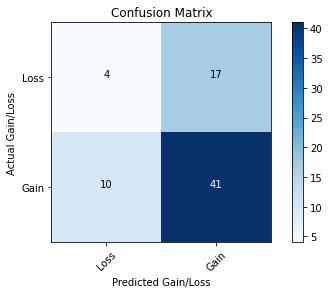

In [74]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Output Predictions to CSV

In [68]:
test_df = pd.merge(x_test_df,y_actual_df,left_index=True,right_index=True)
test_df

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management,first_day_gain_loss_Gain
516,0.791023,-0.431128,1.669573,-0.056427,0.195109,-0.404897,-3778000.0,-0.079211,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
588,2.834215,-2.639492,1.821186,0.354131,0.999992,0.258264,-565045.0,0.326479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
841,0.000000,0.000000,0.000000,-2.237563,0.000000,-9.541401,-4358000.0,-4.306794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1142,0.000000,0.000000,6.355345,0.000000,1.000027,-0.292881,4323000.0,-0.256404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1777,0.000000,0.000000,0.000000,0.000000,0.000000,0.177614,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0.000

In [69]:
results_df = pd.merge(test_df,y_predictions_df,left_index=True,right_index=True)
results_df

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management,first_day_gain_loss_Gain,predicted_range
516,0.791023,-0.431128,1.669573,-0.056427,0.195109,-0.404897,-3778000.0,-0.079211,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.000000e+00
588,2.834215,-2.639492,1.821186,0.354131,0.999992,0.258264,-565045.0,0.326479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.253838e-01
841,0.000000,0.000000,0.000000,-2.237563,0.000000,-9.541401,-4358000.0,-4.306794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.589665e-02
1142,0.000000,0.000000,6.355345,0.000000,1.000027,-0.292881,4323000.0,-0.256404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.987759e-01
1777,0.000000,0.000000,0.000000,0.000000,0.000000,0.177614,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.282495e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [70]:
results_df.rename(columns={'first_day_gain_loss_Gain' :'actual_first_day_gain_loss'}, inplace=True )
results_df

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management,actual_first_day_gain_loss,predicted_range
516,0.791023,-0.431128,1.669573,-0.056427,0.195109,-0.404897,-3778000.0,-0.079211,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.000000e+00
588,2.834215,-2.639492,1.821186,0.354131,0.999992,0.258264,-565045.0,0.326479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.253838e-01
841,0.000000,0.000000,0.000000,-2.237563,0.000000,-9.541401,-4358000.0,-4.306794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.589665e-02
1142,0.000000,0.000000,6.355345,0.000000,1.000027,-0.292881,4323000.0,-0.256404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.987759e-01
1777,0.000000,0.000000,0.000000,0.000000,0.000000,0.177614,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.282495e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [71]:
results_df['predicted_first_day_gain_loss'] = np.where(results_df['predicted_range']>0.5,1,0)
results_df

,debt_asset_ratio,debt_equity_ratio,current_ratio,OCF_ratio,gross_profit_margin,net_profit_margin,cashflow_frominvestment,EBIT_margin,sector_Basic Materials,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Other,sector_Real Estate,sector_Technology,sector_Utilities,industry_Advertising Agencies,industry_Aerospace & Defense,industry_Airlines,industry_Airports & Air Services,industry_Apparel Manufacturing,industry_Asset Management,industry_Auto & Truck Dealerships,industry_Auto Manufacturers,industry_Biotechnology,industry_Building Materials,industry_Building Products & Equipment,industry_Capital Markets,industry_Chemicals,industry_Communication Equipment,industry_Computer Hardware,industry_Credit Services,industry_Diagnostics & Research,industry_Discount Stores,industry_Drug Manufacturers-Specialty & Generic,industry_Education & Training Services,industry_Electrical Equipment & Parts,industry_Electronic Gaming & Multimedia,industry_Entertainment,"industry_Furnishings, Fixtures & Appliances",industry_Gambling,industry_Health Information Services,industry_Information Technology Services,industry_Insurance Brokers,industry_Insurance-Diversified,industry_Insurance-Property & Casualty,industry_Integrated Freight & Logistics,industry_Internet Content & Information,industry_Internet Retail,industry_Lodging,industry_Medical Care Facilities,industry_Medical Devices,industry_Metal Fabrication,industry_Mortgage Finance,industry_Oil & Gas Drilling,industry_Oil & Gas Equipment & Services,industry_Oil & Gas Midstream,industry_Other,industry_Packaged Foods,industry_Packaging & Containers,industry_Pharmaceutical Retailers,industry_Pollution & Treatment Controls,industry_REIT-Diversified,industry_Real Estate Services,industry_Real Estate-Development,industry_Rental & Leasing Services,industry_Residential Construction,industry_Resorts & Casinos,industry_Restaurants,industry_Semiconductors,industry_Shell Companies,industry_Software-Application,industry_Software-Infrastructure,industry_Specialty Chemicals,industry_Specialty Industrial Machinery,industry_Specialty Retail,industry_Staffing & Employment Services,industry_Telecom Services,industry_Travel Services,industry_Utilities-Regulated Gas,industry_Utilities-Regulated Water,industry_Utilities-Renewable,industry_Waste Management,actual_first_day_gain_loss,predicted_range,predicted_first_day_gain_loss
516,0.791023,-0.431128,1.669573,-0.056427,0.195109,-0.404897,-3778000.0,-0.079211,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.000000e+00,1
588,2.834215,-2.639492,1.821186,0.354131,0.999992,0.258264,-565045.0,0.326479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.253838e-01,1
841,0.000000,0.000000,0.000000,-2.237563,0.000000,-9.541401,-4358000.0,-4.306794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.589665e-02,0
1142,0.000000,0.000000,6.355345,0.000000,1.000027,-0.292881,4323000.0,-0.256404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.987759e-01,1
1777,0.000000,0.000000,0.000000,0.000000,0.000000,0.177614,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.282495e-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [72]:
# Exporting test income statement dataframe to csv file
# save_file_path = f'first_day_results.csv'
# results_df.to_csv(save_file_path, index=True, index_label='Index')